# Feature Selection

## Generality

In general, given any *properly trained* Machine Learning model, there will be a command within sklearn or any other library informing about the relevancy of our features:
- Take *coefs_* in the LinearRegression model
- Or *feature_importances_* in any Tree model

These will determine the impact of these features in the model. There will be some more advance techniques in the following, but let us explore these simple approaches for now.

In [18]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()
X = pd.DataFrame(data=iris.data, columns=iris.feature_names)
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y)


rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

rfc.feature_importances_

array([0.09044582, 0.0285867 , 0.42576549, 0.45520198])

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

accuracy = accuracy_score(rfc.predict(X_test),y_test)
output = pd.DataFrame(data = np.column_stack((rfc.predict(X_test),y_test)),columns=['Pred','Target'])
print(f'Accuracy: {accuracy}')
output.sample(5)

Accuracy: 0.9333333333333333


,Pred,Target
12,2,2
2,0,0
11,2,2
4,1,1
27,2,2


Text(0, 0.5, 'Feature')

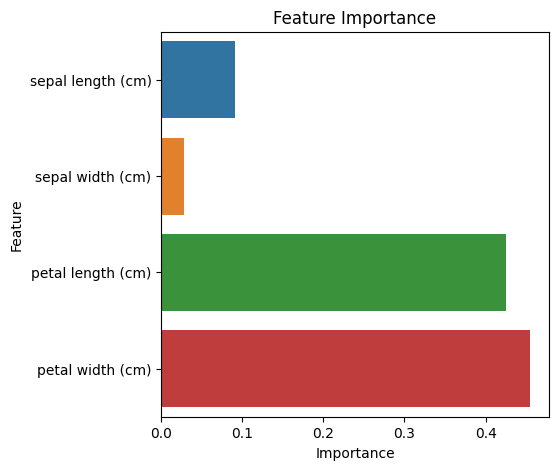

In [20]:
#!pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns 

# Define size of bar plot
plt.figure(figsize=(5,5))
# Plot Searborn bar chart
sns.barplot(x=rfc.feature_importances_, y=X.columns)
#Add chart labels
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature') 

In [8]:
feature_selected_X = X.drop(columns=['sepal length (cm)', 'sepal width (cm)'])
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(feature_selected_X,y,test_size=0.2,stratify=y)


rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

rfc.feature_importances_

array([0.49229738, 0.50770262])

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

accuracy = accuracy_score(rfc.predict(X_test),y_test)
output = pd.DataFrame(data = np.column_stack((rfc.predict(X_test),y_test)),columns=['Pred','Target'])
print(f'Accuracy: {accuracy}')
output.sample(5)

Accuracy: 1.0


,Pred,Target
24,0,0
0,2,2
16,1,1
22,0,0
29,1,1


In [11]:
feature_selected_X = X.drop(columns=['sepal length (cm)'])
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(feature_selected_X,y,test_size=0.2,stratify=y)


rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

rfc.feature_importances_

array([0.10145303, 0.4842567 , 0.41429027])

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

accuracy = accuracy_score(rfc.predict(X_test),y_test)
output = pd.DataFrame(data = np.column_stack((rfc.predict(X_test),y_test)),columns=['Pred','Target'])
print(f'Accuracy: {accuracy}')
output.sample(5)

Accuracy: 0.9333333333333333


,Pred,Target
10,2,2
12,0,0
8,1,1
13,2,2
28,0,0


## Low Variance Filter

Variables with low variance have less impact on the target variable. We can set a threshold value of variance. But there is one thing to remember and it’s very important, Variance is range-dependent, therefore we need to do normalization before applying this technique.

In [13]:
from sklearn.feature_selection import VarianceThreshold
import numpy as np
import pandas as pd
from sklearn.preprocessing import normalize

# generate dataset
np.random.seed(0)

feat1 = np.random.normal(loc=0, scale=.1, size=100) # normal dist. with mean=0 and std=.1
feat2 = np.random.normal(loc=0, scale=10, size=100) # normal dist. with mean=0 and std=10
feat3 = np.random.uniform(low=0, high=10, size=100) # uniform dist. in the interval [0,10)
data = pd.DataFrame(data=np.column_stack((feat1,feat2,feat3)))
data_normalize = pd.DataFrame(data=normalize(np.column_stack((feat1,feat2,feat3))))
data_normalize

,0,1,2
0,0.008342,0.890512,0.454884
1,0.002902,-0.977299,0.211845
2,0.007569,-0.982476,0.186235
3,0.022988,0.994428,0.102884
4,0.015916,-0.999775,0.014002
...,...,...,...
95,0.013130,-0.318776,0.947739
96,0.000112,0.821264,0.570548
97,0.016706,0.770346,0.637408
98,0.000582,0.991867,0.127281


In [41]:
display(data.var())
display(data_normalize.var())

# Now we select the columns with a variance higher than
sel = VarianceThreshold(threshold=0.1)
pd.DataFrame(sel.fit_transform(data_normalize))

0      0.010261
1    108.134929
2      9.163512
dtype: float64

0    0.000525
1    0.662629
2    0.091306
dtype: float64

,0
0,0.890512
1,-0.977299
2,-0.982476
3,0.994428
4,-0.999775
...,...
95,-0.318776
96,0.821264
97,0.770346
98,0.991867


## High correlation Filter

Whenever we have two or several features that are highly correlated, we have to take action and decide whether or not these two features are correlated or their correlation is just coincidental. Feeding a model two features that represent the same situation will lead your model into overestimating the value of these features or neglecting half of their value, but it also introduces a negative weight on the curse of dimensionality.

In [15]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()
X = pd.DataFrame(data=iris.data, columns=iris.feature_names)
y = iris.target

# just getting the correlation matrix 
cor_mat = X.corr()

# Bit of crazy numpy. We are getting the triangular matrix 
# the same size as our correlation matrix, with just Trues and 
# Falses, to then use in a mask. (you can just copy paste this though) 
lower_triangle_mask = np.triu(np.ones(cor_mat.shape)).astype('bool')

# Now mask the correlation matrix, keeping only the lower triangle 
cor_mat_lower = cor_mat.mask(lower_triangle_mask)

# Et voila! 
display(cor_mat_lower)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),NaN,NaN,NaN,NaN
sepal width (cm),-0.117570,NaN,NaN,NaN
petal length (cm),0.871754,-0.428440,NaN,NaN
petal width (cm),0.817941,-0.366126,0.962865,NaN


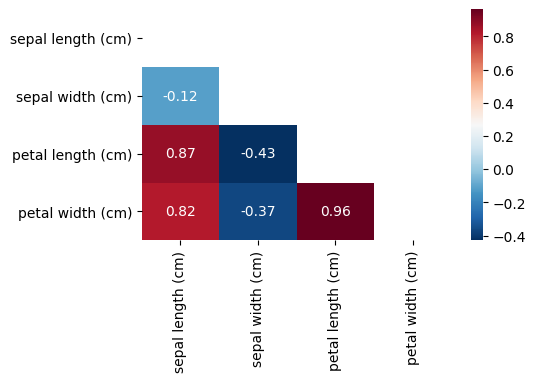

In [77]:
plt.figure(figsize = (5,3)) # <-- just sets the figure size 

sns.heatmap(cor_mat_lower, 
            annot=True,     # <-- write the numbers on the squares
            cmap='RdBu_r'); # <-- use a "red into blue, reversed" colormap 


Humm, seems like in our earlier naive approximation we discarded the elements that had lower impact, but we never realised that the two most important features were somehow highly correlated (maybe not causally, though), so let us see what happens if we now instead take one of these features out.

In [88]:
feature_selected_X = X.drop(columns=['petal length (cm)'])
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(feature_selected_X,y,test_size=0.2,stratify=y)


rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

rfc.feature_importances_

array([0.2837438, 0.1530619, 0.5631943])

In [89]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

accuracy = accuracy_score(rfc.predict(X_test),y_test)
output = pd.DataFrame(data = np.column_stack((rfc.predict(X_test),y_test)),columns=['Pred','Target'])
print(f'Accuracy: {accuracy}')
output.sample(5)

Accuracy: 0.9333333333333333


,Pred,Target
0,1,1
1,1,1
2,1,1
3,0,0
4,0,0
5,2,1
6,2,2
7,0,0
8,2,2
9,2,2


Since this dataset only has 150 cases, it seems hard to determine whether or not it makes sense to keep or eliminate these features. 

## Backward Feature Elimination and Forward Feature Selection

This technique is helpful because it can help to reduce the chances of overfitting the data and make the model more interpretable.

The backward elimination technique is used in machine learning to find the best subset of features from a given set of features. It works by iteratively removing features that are not predictive of the target variable or have the least predictive power.

On the opposite hand, forward selection trains a model with the best predictive feature and iteratively adds the next feature that gives the best new result. 

Both methods can be implemented by the same Python function, called SequentialFeatureSelector (SFS).

Forward-SFS is a greedy procedure that iteratively finds the best new feature to add to the set of selected features. Concretely, we initially start with zero features and find the one feature that maximizes a cross-validated score when an estimator is trained on this single feature. Once that first feature is selected, we repeat the procedure by adding a new feature to the set of selected features. The procedure stops when the desired number of selected features is reached, as determined by the n_features_to_select parameter.

Backward-SFS follows the same idea but works in the opposite direction: instead of starting with no features and greedily adding features, we start with all the features and greedily remove features from the set. The direction parameter controls whether forward or backward SFS is used.

In general, forward and backward selection do not yield equivalent results. Also, one may be much faster than the other depending on the requested number of selected features: if we have 10 features and ask for 7 selected features, forward selection would need to perform 7 iterations while backward selection would only need to perform 3.

In [23]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()  # noqa
housing_df = pd.DataFrame(data = housing.data, columns = housing.feature_names)
y = pd.DataFrame(data = housing.target, columns = housing.target_names)
housing_df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

mlxtend library contains built-in implementation for most of the wrapper methods based feature selection techniques. SequentialFeatureSelector() function comes with various combinations of feature selection techniques.


In [24]:
#!pip install mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

sfs = SequentialFeatureSelector(lreg, k_features=4, forward=False, verbose=1, scoring='neg_mean_squared_error')

sfs.fit(housing_df,y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.4s finished
Features: 7/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.3s finished
Features: 6/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s finished
Features: 5/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished
Features: 4/4

SequentialFeatureSelector(estimator=LinearRegression(), forward=False,
                          k_features=(4, 4), scoring='neg_mean_squared_error',
                          verbose=1)

In [25]:
feat_names = list(sfs.k_feature_names_)
print(feat_names)

['MedInc', 'HouseAge', 'Latitude', 'Longitude']


In [26]:
new_data = housing_df[feat_names]
new_data.head()

,MedInc,HouseAge,Latitude,Longitude
0,8.3252,41.0,37.88,-122.23
1,8.3014,21.0,37.86,-122.22
2,7.2574,52.0,37.85,-122.24
3,5.6431,52.0,37.85,-122.25
4,3.8462,52.0,37.85,-122.25


In [104]:
new_data.shape, housing_df.shape

((20640, 4), (20640, 8))

If instead, we would like to use $p$-values, we can use Ordinary Least Squares to select the features.

In [29]:
#!pip install statsmodels
import statsmodels.api as sm

def backward_elimination(data, target, significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features

backward_elimination(housing_df, y)

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'AveOccup',
 'Latitude',
 'Longitude']

In [106]:
# Same thing, but with Forward selection
lreg = LinearRegression()

sfs = SequentialFeatureSelector(lreg, k_features=4, forward=True, verbose=1, scoring='neg_mean_squared_error')

sfs.fit(housing_df,y)
feat_names = list(sfs.k_feature_names_)
print(feat_names)
new_data = housing_df[feat_names]
new_data.head()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s finished
Features: 1/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s finished
Features: 2/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s finished
Features: 3/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
Features: 4/4

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms']


,MedInc,HouseAge,AveRooms,AveBedrms
0,8.3252,41.0,6.984127,1.023810
1,8.3014,21.0,6.238137,0.971880
2,7.2574,52.0,8.288136,1.073446
3,5.6431,52.0,5.817352,1.073059
4,3.8462,52.0,6.281853,1.081081


We see that Backwards feature elimination gave *['MedInc', 'HouseAge', 'Latitude', 'Longitude']*, while Forwards feature selection chose *['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms']*.